<a href="https://colab.research.google.com/github/antonBy77/LSTM_backtest/blob/main/BACK_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Описание для тестера**
Цель: Целью данного скрипта является выполнение прогноза цен на основе исторических данных и их сравнение с реальными данными. Прогноз генерируется с помощью API и отображается на графике для анализа точности предсказания.

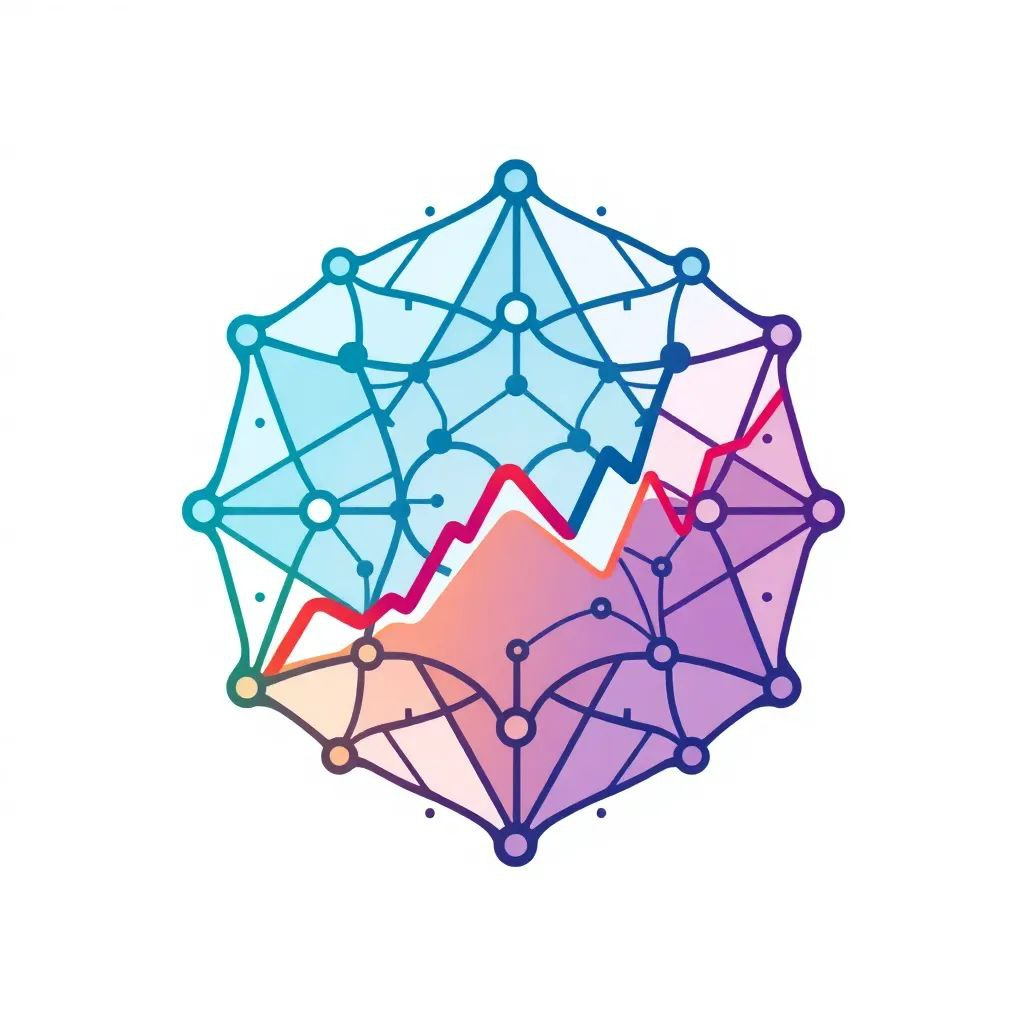
Основные функции:

Запрос прогноза с API: Скрипт отправляет запрос к внешнему API для получения прогноза цен на основе данных за указанный период. API требует указания тикера, интервала (например, "1h"), начальной и конечной даты прогноза, а также количества будущих шагов (future_steps).

Загрузка реальных данных: Загружаются реальные данные с Yahoo Finance (через библиотеку yfinance) за расширенный период: начиная за 3 дня до начала прогноза и заканчивая 3 днями после окончания прогноза. Это позволяет анализировать точность прогноза и сравнить его с фактическими данными.

Отображение графика: Реальные данные и прогнозируемые данные отображаются на одном графике для визуальной оценки точности прогноза. Реальные данные отображаются синим цветом, а прогноз — красным (пунктирная линия).

Шаги для тестирования:

Убедитесь, что API для прогнозов работает корректно, проверив, что возвращаемые данные соответствуют ожидаемому формату (массив прогнозных значений).
Проверьте правильность загрузки реальных данных: они должны быть загружены для периода, начиная за 3 дня до начала прогноза и заканчивая 3 днями после его окончания.
Подтвердите, что график правильно отображает как реальные, так и прогнозируемые данные. Реальные данные должны быть синего цвета, а прогноз — красного цвета, с пунктирной линией.
Протестируйте несколько различных тикеров и интервалов (например, для разных акций и временных интервалов) для проверки стабильности работы скрипта.
Убедитесь, что на графике отображается точное время для прогноза и реальных данных, и что он корректно масштабируется на временной оси.
Требования:

Установлен Python 3.x.
Установлены библиотеки:
requests
pandas
matplotlib
yfinance
Активный интернет для загрузки данных и работы с API.
Ошибки и исключения:

Ошибка API (например, ошибка 400 или 500) — в таком случае, скрипт должен вывести информацию об ошибке и завершить работу.
Если API не возвращает прогнозные данные, скрипт должен вывести сообщение о том, что данные не получены.
Ошибка при загрузке реальных данных (например, если указанные даты некорректны) должна быть корректно обработана.
Ожидаемый результат: После запуска скрипта вы должны увидеть график, на котором:

Реальные данные отображаются синей линией.
Прогнозные данные отображаются красной пунктирной линией, начиная с даты начала прогноза.

**Жду ваши комментарии ....**

[*********************100%***********************]  1 of 1 completed


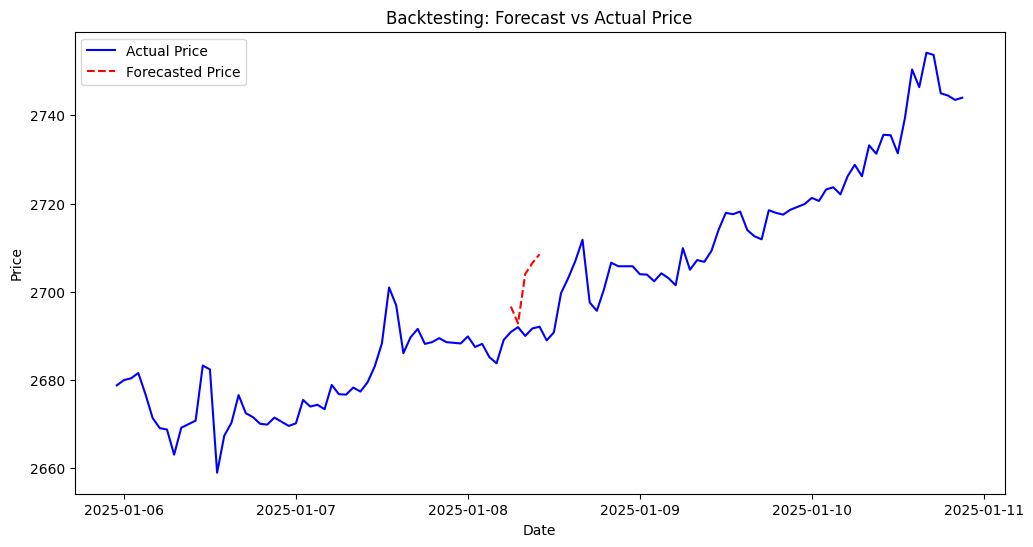

In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# API URL
API_URL = "https://api-antonbustrov.amvera.io/predict"

def format_date_for_api(date):
    # Преобразуем дату в формат, который требуется API
    return date.strftime('%Y-%m-%d-%H-%M')

def fetch_prediction(ticker, start_date, end_date, interval, future_steps, time_step=100):
    """
    start_date – начальная дата для прогноза
    end_date – конечная дата для прогноза
    """
    params = {
        "ticker": ticker,
        "start_date": format_date_for_api(start_date),
        "end_date": format_date_for_api(end_date),
        "interval": interval,
        "future_steps": future_steps,
        "time_step": time_step  # добавлен time_step для корректной работы API
    }
    response = requests.get(API_URL, params=params)
    # Проверяем статус ответа
    if response.status_code == 200:
        return response.json()  # Возвращаем JSON, если запрос успешен
    else:
        print(f"Ошибка запроса: {response.status_code}, {response.text}")
        return None

def fetch_actual_data(ticker, start, end, interval):
    # Загружаем реальные данные с yfinance
    data = yf.download(ticker, start=start, end=end, interval=interval)
    return data[['Close']]

def plot_results(actual_data, predictions, forecast_start):
    plt.figure(figsize=(12, 6))

    # Рисуем реальные данные
    plt.plot(actual_data.index, actual_data['Close'], label='Actual Price', color='blue')

    # Создаём временную ось для прогнозных данных, начиная с forecast_start
    forecast_dates = pd.date_range(start=forecast_start, periods=len(predictions), freq='h')
    plt.plot(forecast_dates, predictions, label='Forecasted Price', linestyle='--', color='red')

    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.title("Backtesting: Forecast vs Actual Price")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    ticker = "GCJ25.cmx"
    interval = "1h"
    future_steps = 5  # Количество прогнозных шагов (часов)
    time_step = 512    # Значение для time_step, как указано в примере cURL

    # Дата начала прогноза — 10 декабря 2024 года
    forecast_start = pd.to_datetime("2025-01-08 06:00")
    # Дата конца прогноза — на 24 часа позже
    forecast_end = forecast_start + pd.Timedelta(hours=future_steps)

    # Для прогноза нужно брать период, например, с 1 декабря 2024 года по 10 декабря 2024
    training_start = pd.to_datetime("2024-03-01 00:00")
    training_end = forecast_start  # Прогнозируем на основе данных до 10 декабря

    # Задаем период для реальных данных: 3 дня до начала и 3 дня после конца прогноза
    actual_start = forecast_start - pd.Timedelta(days=3)  # 3 дня до начала прогноза
    actual_end = forecast_end + pd.Timedelta(days=3)      # 3 дня после конца прогноза

    # Получаем прогнозные данные от API
    prediction_data = fetch_prediction(ticker, training_start, training_end, interval, future_steps, time_step)

    if prediction_data:
        predictions = prediction_data.get("predictions", [])

        if not predictions:
            print("Прогнозные данные не получены.")
        else:
            # Преобразуем список прогнозов в Series для удобства
            predictions_series = pd.Series(predictions, index=pd.date_range(start=forecast_start, periods=len(predictions), freq='h'))

            # Загружаем реальные данные за расширенный период (с 3 дней до начала до 3 дней после конца)
            actual_data = fetch_actual_data(ticker, actual_start, actual_end, interval)

            # Строим график, где по оси X — время, а отображены реальные цены и прогноз
            plot_results(actual_data, predictions_series, forecast_start)


[*********************100%***********************]  1 of 1 completed


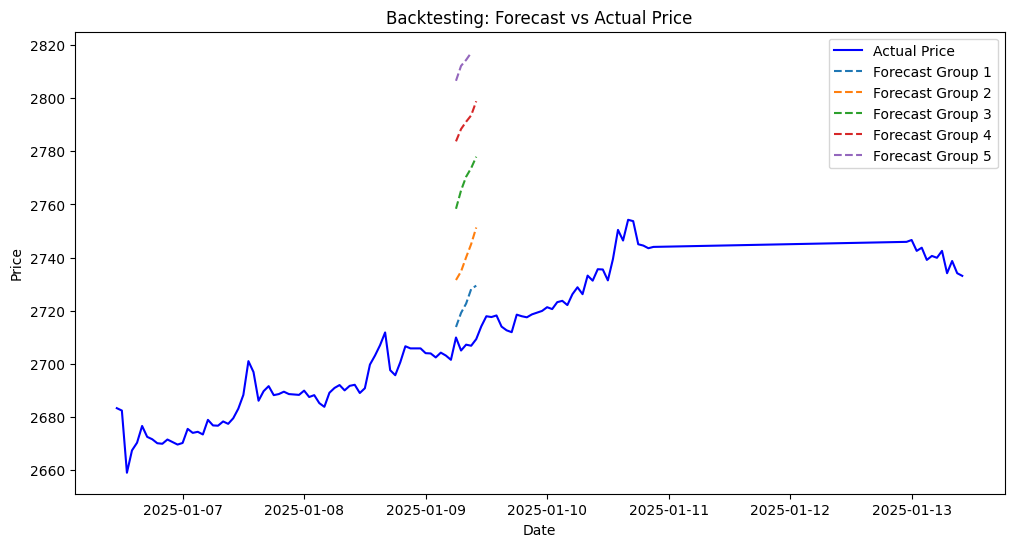

In [7]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# API URL
API_URL = "https://api-antonbustrov.amvera.io/predict"

def format_date_for_api(date):
    # Преобразуем дату в формат, который требуется API
    return date.strftime('%Y-%m-%d-%H-%M')

def fetch_prediction(ticker, start_date, end_date, interval, future_steps, time_step=100):
    """
    start_date – начальная дата для прогноза
    end_date – конечная дата для прогноза
    """
    params = {
        "ticker": ticker,
        "start_date": format_date_for_api(start_date),
        "end_date": format_date_for_api(end_date),
        "interval": interval,
        "future_steps": future_steps,
        "time_step": time_step  # добавлен time_step для корректной работы API
    }
    response = requests.get(API_URL, params=params)
    # Проверяем статус ответа
    if response.status_code == 200:
        return response.json()  # Возвращаем JSON, если запрос успешен
    else:
        print(f"Ошибка запроса: {response.status_code}, {response.text}")
        return None

def fetch_actual_data(ticker, start, end, interval):
    # Загружаем реальные данные с yfinance
    data = yf.download(ticker, start=start, end=end, interval=interval)
    return data[['Close']]

def plot_results(actual_data, predictions, forecast_start, group_size=5):
    plt.figure(figsize=(12, 6))

    # Рисуем реальные данные
    plt.plot(actual_data.index, actual_data['Close'], label='Actual Price', color='blue')

    # Разделяем прогноз на группы по 5 часов и рисуем их
    for i in range(0, len(predictions), group_size):
        group_end = i + group_size
        group_predictions = predictions[i:group_end]
        forecast_dates = pd.date_range(start=forecast_start, periods=len(group_predictions), freq='h')
        # Наложим разные группы на график с разными линиями
        plt.plot(forecast_dates, group_predictions, linestyle='--', label=f'Forecast Group {i//group_size + 1}')

    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.title("Backtesting: Forecast vs Actual Price")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    ticker = "GCJ25.cmx"
    interval = "1h"
    future_steps = 24  # Количество прогнозных шагов (часов)
    time_step = 512    # Значение для time_step, как указано в примере cURL

    # Дата начала прогноза — 10 декабря 2024 года
    forecast_start = pd.to_datetime("2025-01-09 06:00")
    # Дата конца прогноза — на 24 часа позже
    forecast_end = forecast_start + pd.Timedelta(hours=future_steps)

    # Для прогноза нужно брать период, например, с 1 декабря 2024 года по 10 декабря 2024
    training_start = pd.to_datetime("2024-03-01 00:00")
    training_end = forecast_start  # Прогнозируем на основе данных до 10 декабря

    # Задаем период для реальных данных: 3 дня до начала и 3 дня после конца прогноза
    actual_start = forecast_start - pd.Timedelta(days=3)  # 3 дня до начала прогноза
    actual_end = forecast_end + pd.Timedelta(days=3)      # 3 дня после конца прогноза

    # Получаем прогнозные данные от API
    prediction_data = fetch_prediction(ticker, training_start, training_end, interval, future_steps, time_step)

    if prediction_data:
        predictions = prediction_data.get("predictions", [])

        if not predictions:
            print("Прогнозные данные не получены.")
        else:
            # Преобразуем список прогнозов в Series для удобства
            predictions_series = pd.Series(predictions, index=pd.date_range(start=forecast_start, periods=len(predictions), freq='h'))

            # Загружаем реальные данные за расширенный период (с 3 дней до начала до 3 дней после конца)
            actual_data = fetch_actual_data(ticker, actual_start, actual_end, interval)

            # Строим график с групповым прогнозом
            plot_results(actual_data, predictions_series, forecast_start, group_size=5)


[*********************100%***********************]  1 of 1 completed


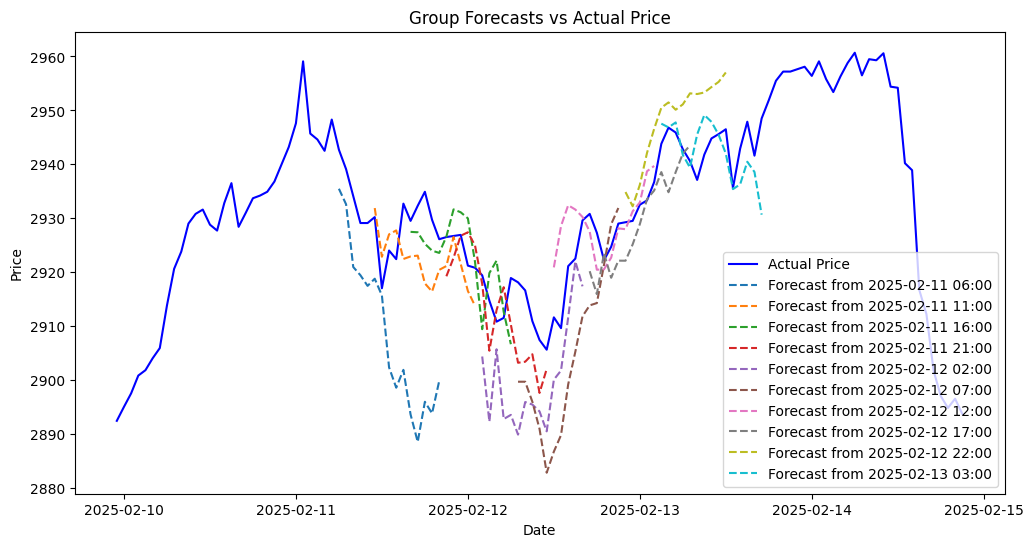

In [13]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# API URL
API_URL = "https://api-antonbustrov.amvera.io/predict"

def format_date_for_api(date):
    """Преобразует дату в формат YYYY-MM-DD-HH-MM, требуемый API."""
    return date.strftime('%Y-%m-%d-%H-%M')

def fetch_prediction(ticker, training_start, training_end, interval, future_steps, time_step=100):
    """
    Получает прогноз от API.
    :param ticker: тикер
    :param training_start: начало обучающего периода (datetime)
    :param training_end: конец обучающего периода (datetime), прогноз делается на основе данных до этого момента
    :param interval: интервал данных (например, "1h")
    :param future_steps: количество шагов прогноза (например, 5 – прогноз на 5 часов)
    :param time_step: дополнительный параметр, требуемый API
    :return: JSON с прогнозом или None в случае ошибки
    """
    params = {
        "ticker": ticker,
        "start_date": format_date_for_api(training_start),
        "end_date": format_date_for_api(training_end),
        "interval": interval,
        "future_steps": future_steps,
        "time_step": time_step
    }
    response = requests.get(API_URL, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Ошибка запроса: {response.status_code}, {response.text}")
        return None

def fetch_actual_data(ticker, start, end, interval):
    """
    Загружает реальные данные с yfinance.
    :param ticker: тикер
    :param start: начало периода (datetime)
    :param end: конец периода (datetime)
    :param interval: интервал данных
    :return: DataFrame с данными (столбец 'Close')
    """
    data = yf.download(ticker, start=start, end=end, interval=interval)
    return data[['Close']]

def plot_group_forecasts(actual_data, group_forecasts):
    """
    Отображает на одном графике реальные данные и серию прогнозов.
    :param actual_data: DataFrame с реальными данными
    :param group_forecasts: список кортежей (forecast_start, forecast_series)
    """
    plt.figure(figsize=(12, 6))

    # Отображаем реальные данные (синим цветом)
    plt.plot(actual_data.index, actual_data['Close'], label='Actual Price', color='blue')

    # Отображаем каждый прогноз (пунктирная линия)
    for forecast_start, forecast_series in group_forecasts:
        forecast_dates = pd.date_range(start=forecast_start, periods=len(forecast_series), freq='h')
        label = f"Forecast from {forecast_start.strftime('%Y-%m-%d %H:%M')}"
        plt.plot(forecast_dates, forecast_series, label=label, linestyle='--')

    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.title("Group Forecasts vs Actual Price")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    ticker = "GCJ25.cmx"
    interval = "1h"
    future_steps = 15       # Каждый прогноз рассчитан на 5 часов
    time_step = 512        # Значение для time_step, как требует API
    num_forecasts = 10      # Количество прогнозов в группе
    forecast_interval = pd.Timedelta(hours=5)  # Прогнозы запускаются с интервалом 5 часов

    # Задаём фиксированный обучающий период: данные от этой даты до момента прогноза
    training_start = pd.to_datetime("2024-03-01 00:00")
    # Начальный момент, с которого начинаем делать прогнозы
    initial_forecast_start = pd.to_datetime("2025-02-11 06:00")

    group_forecasts = []

    # Генерируем несколько прогнозов с интервалом 5 часов
    for i in range(num_forecasts):
        current_forecast_start = initial_forecast_start + i * forecast_interval
        training_end = current_forecast_start  # Прогнозируем на основе данных до текущего момента

        prediction_data = fetch_prediction(ticker, training_start, training_end, interval, future_steps, time_step)
        if prediction_data:
            predictions = prediction_data.get("predictions", [])
            if predictions:
                # Преобразуем список прогнозов в Series (с временными метками)
                forecast_series = pd.Series(predictions, index=pd.date_range(start=current_forecast_start, periods=len(predictions), freq='h'))
                group_forecasts.append((current_forecast_start, forecast_series))
            else:
                print(f"Прогнозные данные не получены для прогноза с {current_forecast_start}")
        else:
            print(f"Ошибка запроса для прогноза с {current_forecast_start}")

    # Определяем период для загрузки реальных данных:
    # от 3 дней до начала первого прогноза до 3 дней после окончания последнего прогноза
    if group_forecasts:
        earliest_forecast_start = group_forecasts[0][0]
        latest_forecast_start = group_forecasts[-1][0]
        latest_forecast_end = latest_forecast_start + pd.Timedelta(hours=future_steps)

        actual_start = earliest_forecast_start - pd.Timedelta(days=3)
        actual_end = latest_forecast_end + pd.Timedelta(days=3)

        actual_data = fetch_actual_data(ticker, actual_start, actual_end, interval)

        # Отображаем все прогнозы и реальные данные на одном графике
        plot_group_forecasts(actual_data, group_forecasts)


[*********************100%***********************]  1 of 1 completed


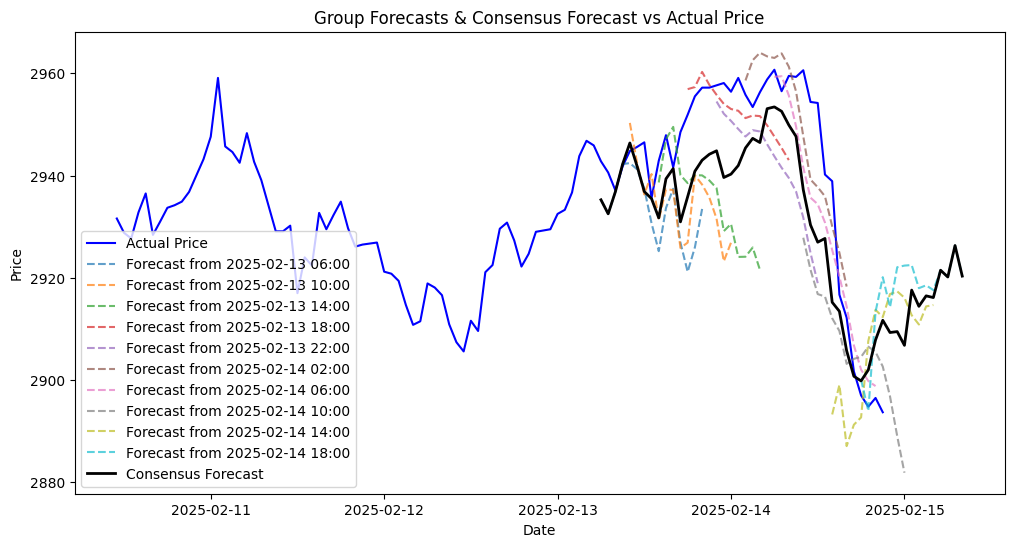

In [20]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# API URL
API_URL = "https://api-antonbustrov.amvera.io/predict"

def format_date_for_api(date):
    """Преобразует дату в формат YYYY-MM-DD-HH-MM, требуемый API."""
    return date.strftime('%Y-%m-%d-%H-%M')

def fetch_prediction(ticker, training_start, training_end, interval, future_steps, time_step=100):
    """
    Получает прогноз от API.
    :param ticker: тикер
    :param training_start: начало обучающего периода (datetime)
    :param training_end: конец обучающего периода (datetime), прогноз делается на основе данных до этого момента
    :param interval: интервал данных (например, "1h")
    :param future_steps: количество шагов прогноза (например, 5 – прогноз на 5 часов)
    :param time_step: дополнительный параметр, требуемый API
    :return: JSON с прогнозом или None в случае ошибки
    """
    params = {
        "ticker": ticker,
        "start_date": format_date_for_api(training_start),
        "end_date": format_date_for_api(training_end),
        "interval": interval,
        "future_steps": future_steps,
        "time_step": time_step
    }
    response = requests.get(API_URL, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Ошибка запроса: {response.status_code}, {response.text}")
        return None

def fetch_actual_data(ticker, start, end, interval):
    """
    Загружает реальные данные с yfinance.
    :param ticker: тикер
    :param start: начало периода (datetime)
    :param end: конец периода (datetime)
    :param interval: интервал данных
    :return: DataFrame с данными (столбец 'Close')
    """
    data = yf.download(ticker, start=start, end=end, interval=interval)
    return data[['Close']]

def compute_consensus_forecast(group_forecasts):
    """
    Рассчитывает консенсус-прогноз как среднее по всем прогнозам для каждого временного штампа.
    :param group_forecasts: список кортежей (forecast_start, forecast_series)
    :return: pandas Series с консенсус-прогнозом
    """
    # Объединяем все прогнозные серии в один DataFrame по их индексам
    df_forecasts = pd.concat([series for _, series in group_forecasts], axis=1)
    consensus = df_forecasts.mean(axis=1)
    return consensus

def plot_group_forecasts(actual_data, group_forecasts, consensus_forecast):
    """
    Отображает реальные данные, индивидуальные прогнозы и консенсус-прогноз на одном графике.
    :param actual_data: DataFrame с реальными данными
    :param group_forecasts: список кортежей (forecast_start, forecast_series)
    :param consensus_forecast: pandas Series с консенсус-прогнозом
    """
    plt.figure(figsize=(12, 6))

    # Рисуем реальные данные
    plt.plot(actual_data.index, actual_data['Close'], label='Actual Price', color='blue')

    # Рисуем каждый индивидуальный прогноз
    for forecast_start, forecast_series in group_forecasts:
        forecast_dates = pd.date_range(start=forecast_start, periods=len(forecast_series), freq='h')
        label = f"Forecast from {forecast_start.strftime('%Y-%m-%d %H:%M')}"
        plt.plot(forecast_dates, forecast_series, label=label, linestyle='--', alpha=0.7)

    # Рисуем консенсус-прогноз жирной чёрной линией
    plt.plot(consensus_forecast.index, consensus_forecast, label='Consensus Forecast', color='black', linewidth=2)

    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.title("Group Forecasts & Consensus Forecast vs Actual Price")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    ticker = "GCJ25.cmx"
    interval = "1h"
    future_steps = 15       # Каждый прогноз рассчитан на 5 часов
    time_step = 512        # Значение для time_step, как требует API
    num_forecasts = 10     # Количество прогнозов в группе
    forecast_interval = pd.Timedelta(hours=4)  # Интервал между запусками прогнозов (чтобы они перекрывались)

    # Фиксированный обучающий период: данные от этой даты до момента прогноза
    training_start = pd.to_datetime("2024-03-01 00:00")
    # Начальный момент, с которого начинаем делать прогнозы
    initial_forecast_start = pd.to_datetime("2025-02-13 06:00")

    group_forecasts = []

    # Генерируем несколько прогнозов с интервалом forecast_interval (чтобы прогнозы перекрывались)
    for i in range(num_forecasts):
        current_forecast_start = initial_forecast_start + i * forecast_interval
        training_end = current_forecast_start  # Прогнозируем на основе данных до текущего момента

        prediction_data = fetch_prediction(ticker, training_start, training_end, interval, future_steps, time_step)
        if prediction_data:
            predictions = prediction_data.get("predictions", [])
            if predictions:
                # Преобразуем список прогнозов в Series с временными метками
                forecast_series = pd.Series(predictions, index=pd.date_range(start=current_forecast_start, periods=len(predictions), freq='h'))
                group_forecasts.append((current_forecast_start, forecast_series))
            else:
                print(f"Прогнозные данные не получены для прогноза с {current_forecast_start}")
        else:
            print(f"Ошибка запроса для прогноза с {current_forecast_start}")

    if group_forecasts:
        # Рассчитываем консенсус-прогноз как среднее по всем индивидуальным прогнозам
        consensus_forecast = compute_consensus_forecast(group_forecasts)

        # Определяем период для загрузки реальных данных:
        # от 3 дней до начала первого прогноза до 3 дней после окончания последнего прогнозного интервала
        earliest_forecast_start = group_forecasts[0][0]
        latest_forecast_start = group_forecasts[-1][0]
        latest_forecast_end = latest_forecast_start + pd.Timedelta(hours=future_steps)

        actual_start = earliest_forecast_start - pd.Timedelta(days=3)
        actual_end = latest_forecast_end + pd.Timedelta(days=3)

        actual_data = fetch_actual_data(ticker, actual_start, actual_end, interval)

        # Отображаем реальные данные, индивидуальные прогнозы и консенсус-прогноз
        plot_group_forecasts(actual_data, group_forecasts, consensus_forecast)
